In [1]:
from transformers import AutoModel

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [14]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o DataFrame
df = pd.read_csv(r"C:\Users\franc\OneDrive\Documentos\LabMol\IC-Skin\DADOS\GHS\curated_binary_GHS.csv")  # Substitua 'seu_arquivo.csv' pelo caminho do seu arquivo

df['mol'] = [Chem.MolFromSmiles(x) for x in df['SMILES']]
fps = np.array([AllChem.GetMorganFingerprintAsBitVect(x, radius = 2, nBits = 2048, useFeatures=False) for x in df['mol']])

In [15]:
# Calcular as coordenadas 2D usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(fps)

# Adicionar as coordenadas ao DataFrame
df['tsne-2d-x'] = tsne_results[:,0]
df['tsne-2d-y'] = tsne_results[:,1]


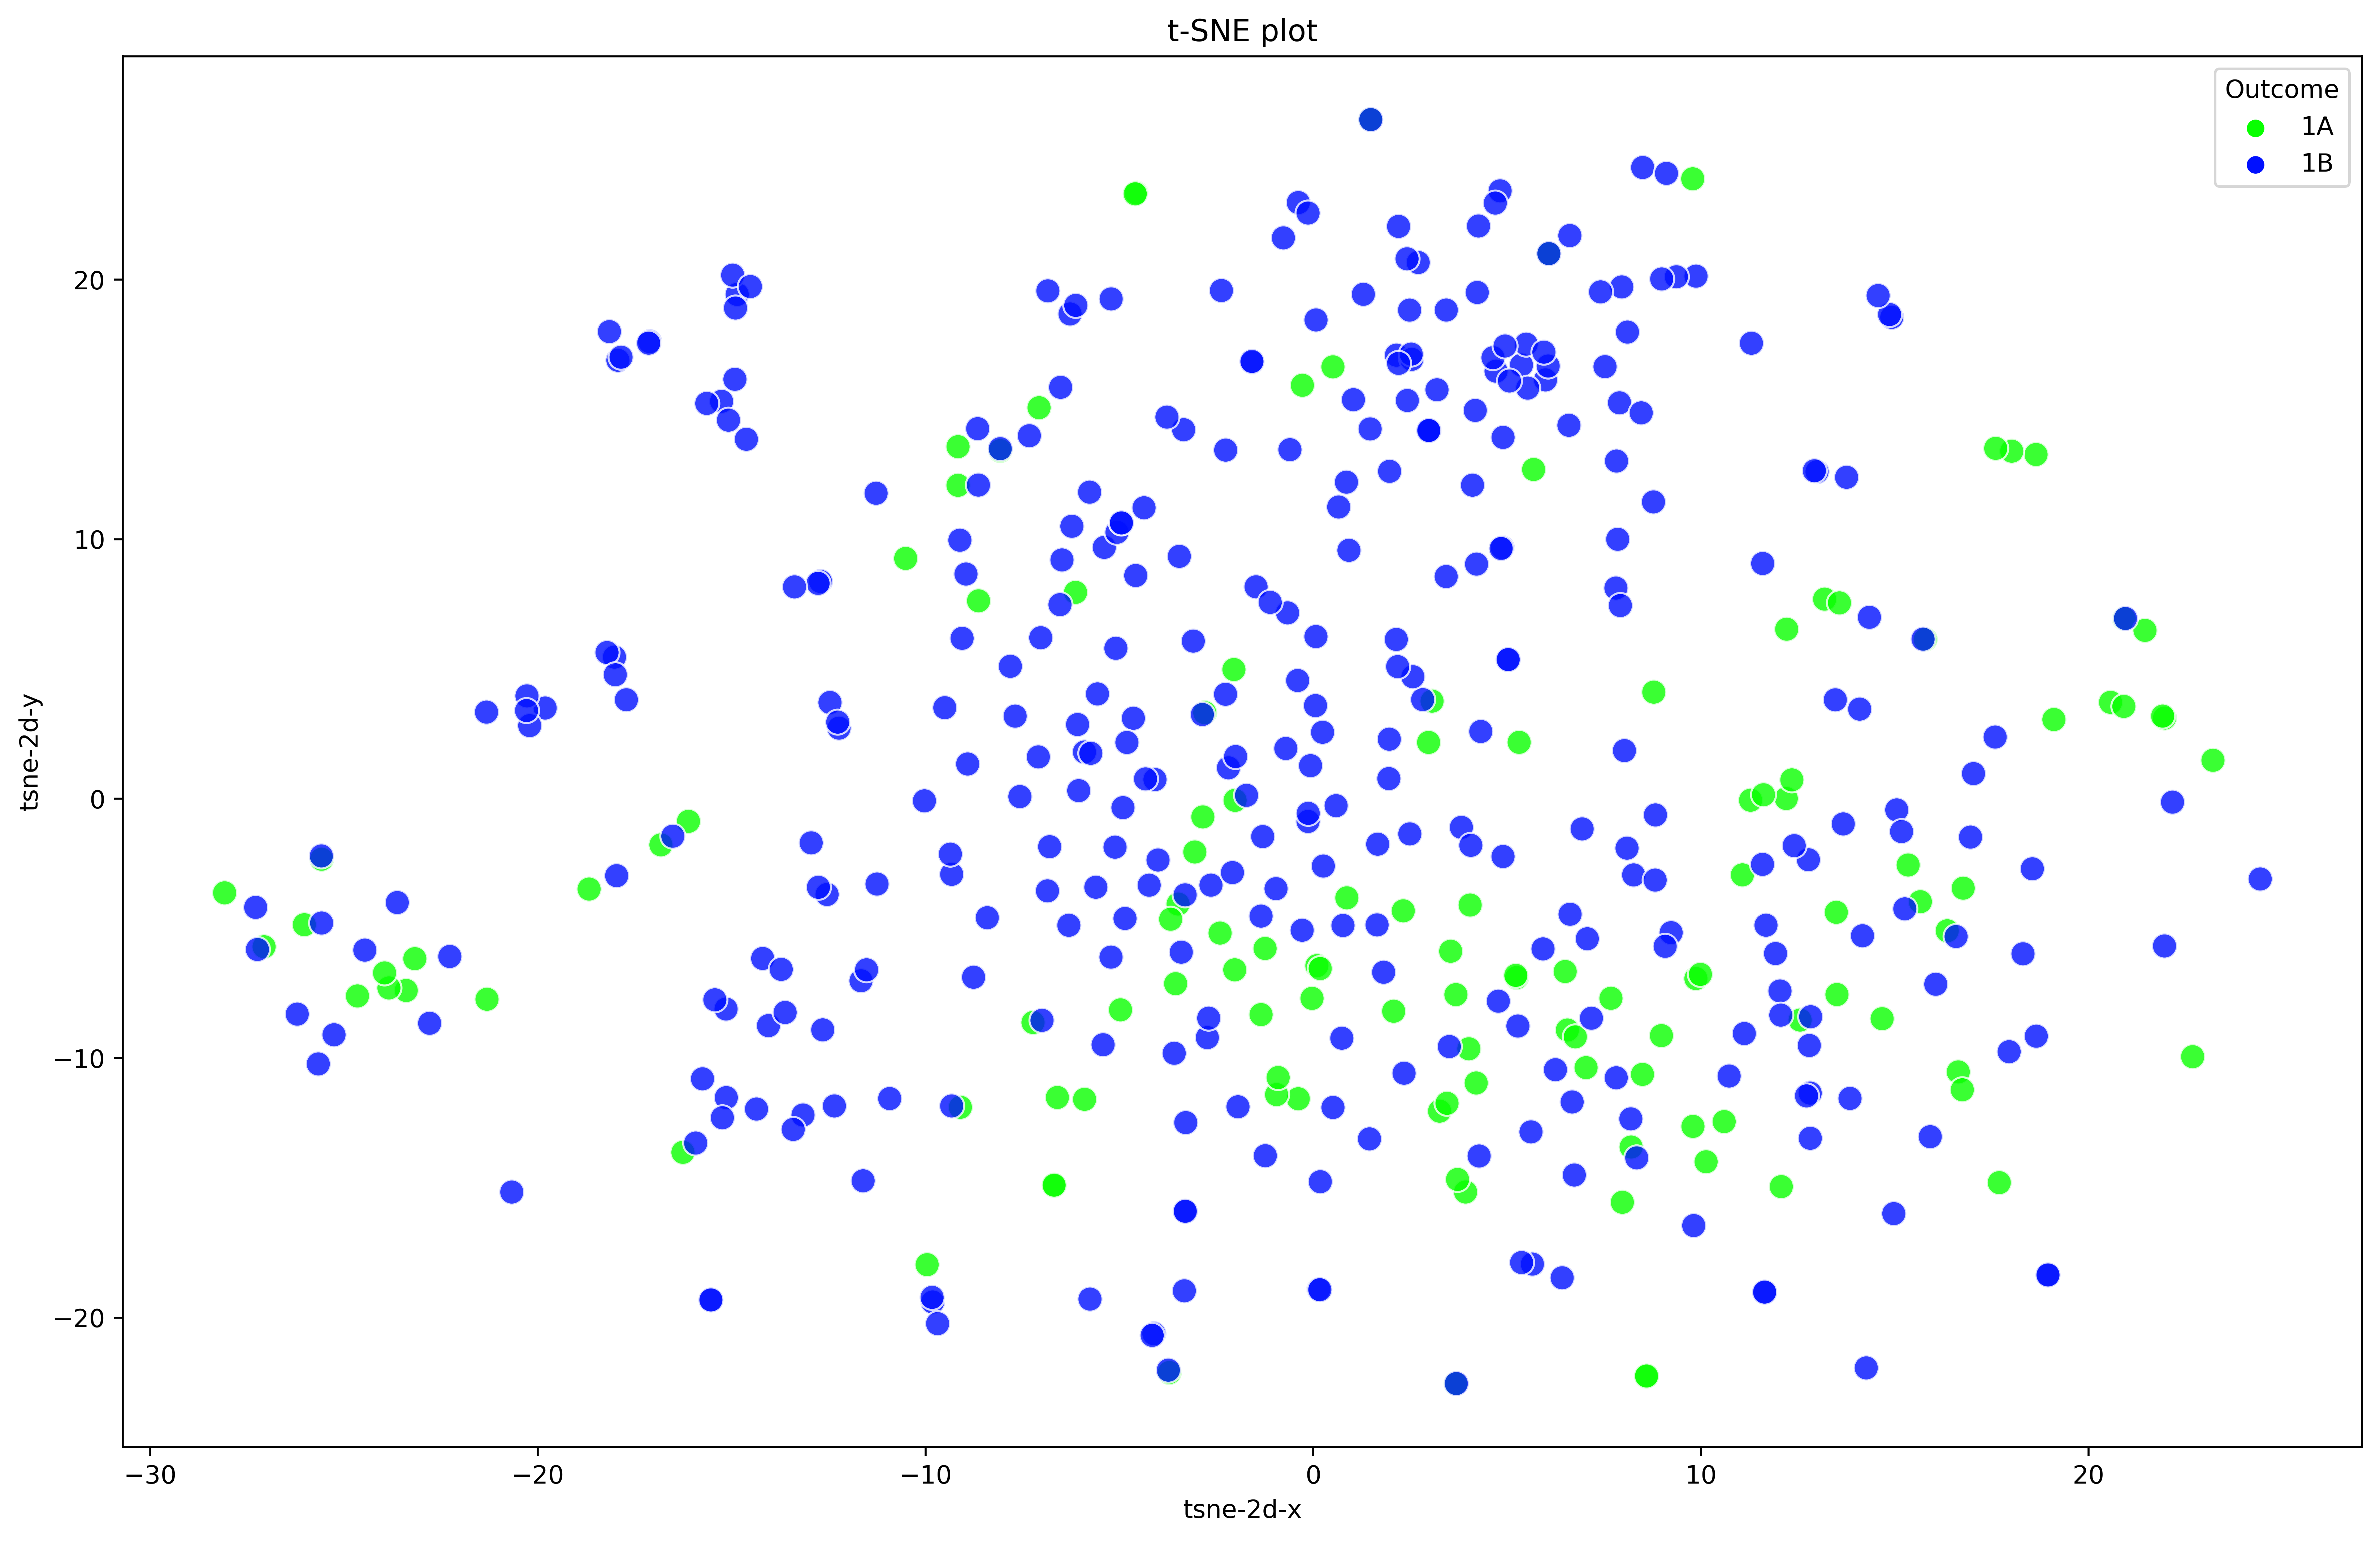

In [16]:
# Plotar o resultado
plt.figure(figsize=(16, 10), dpi=500)
sns.scatterplot(
    x='tsne-2d-x', y='tsne-2d-y',
    hue='Outcome',
    palette=sns.color_palette("hsv", df['Outcome'].nunique()),
    data=df,
    legend="full",
    alpha=0.8,
    s = 100
)
plt.show()